In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

    
from misc_utils import load_raw_responses_with_traces,load_random_trace_sample
from session_and_tree_utils import *  


import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import random
from ml_utils import *

# ETL

In [2]:
df_r = load_random_trace_sample()
df_r['sessions'] = df_r['trace_data'].apply(sessionize)
df_r['click_session'] = df_r['sessions'].apply(lambda x: random.choice(x))
df_r['click_forest'] = df_r['click_session'].apply(getMinimumSpanningForest)
df_r['click_tree'] = df_r['click_forest'].apply(lambda x: random.choice(x))
df_r['condition'] = 'sample'

In [3]:
df_c = load_raw_responses_with_traces()
df_c = get_sessions_and_trees(df_c)
df_c['condition'] = 'click'
df_c = df_c[df_r.columns]

In [4]:
df = pd.concat([df_r, df_c])

In [5]:
def get_host(r):
    try:
        return r['access_method']
    except:
        return 'unknown'
df['host'] = df['click_session'].apply(lambda x: get_host(x[0]))

# Num Pageviews

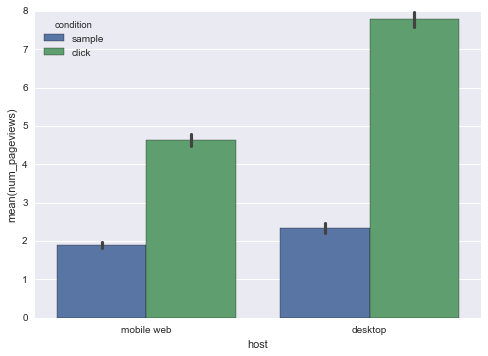

In [6]:
metric = 'num_pageviews'
df[metric] = df['click_session'].apply(num_pageviews)
df = df.query("host != 'unknown'")

sns.barplot(
            y = metric,
            x = 'host',
            data=df,
            hue = 'condition'
            )

# Session Length

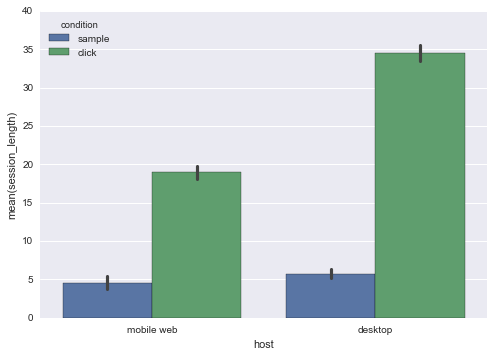

In [7]:
metric = 'session_length'
df[metric] = df['click_session'].apply(get_session_length)

sns.barplot(
            y = metric,
            x = 'host',
            data=df,
            hue = 'condition'
            )